In [1]:
# base64 is to encode image files for transmission as JSON text
import base64
import os
import sys
import math
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from difflib import SequenceMatcher

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from googleapiclient import discovery 
from googleapiclient import errors
from oauth2client.client import GoogleCredentials

DISCOVERY_URL = 'https://{api}.googleapis.com/$discovery/rest?version={apiVersion}'  # noqa
os.environ['GOOGLE_APPLICATION_CREDENTIALS']='saurabh_google_api_credential.json'

### Feature Type	Description
LABEL_DETECTION	Execute Image Content Analysis on the entire image and return

TEXT_DETECTION	Perform Optical Character Recognition (OCR) on text within the image

FACE_DETECTION	Detect faces within the image

LANDMARK_DETECTION	Detect geographic landmarks within the image

LOGO_DETECTION	Detect company logos within the image

SAFE_SEARCH_DETECTION	Determine image safe search properties on the image

IMAGE_PROPERTIES	Compute a set of properties about the image (such as the image's dominant colors)

In [2]:
class VisionApi:
    """Construct and use the Google Vision API service."""

    def __init__(self, api_discovery_file='vision_api.json'):
        self.credentials = GoogleCredentials.get_application_default()
        self.service = discovery.build(
            'vision', 
            'v1', 
            credentials=self.credentials,
            discoveryServiceUrl=DISCOVERY_URL
        )

    def detect_text(self, input_filenames, num_retries=3, max_results=6):
        """Uses the Vision API to detect text in the given file.
        """
        images = {}
        for filename in input_filenames:
            print(filename)
            assert(os.path.exists(filename))
            with open(filename, 'rb') as image_file:
                images[filename] = image_file.read()

        batch_request = []
        for filename in images:
            batch_request.append({
                'image': {
                    'content': base64.b64encode(images[filename]).decode('UTF-8')
                },
                'features': [{
                    'type': 'TEXT_DETECTION',  #Tells Vision API that we're making a request to do OCR, else 'LABEL_DETECTION'
                    'maxResults': max_results,
                }]
            })
        request = self.service.images().annotate(body={'requests': batch_request})

        try:
            responses = request.execute(num_retries=num_retries)
            if 'responses' not in responses:
                return {}
            text_response = {}
            for filename, response in zip(images, responses['responses']):
                if 'error' in response:
                    print("API Error for %s: %s" % (
                            filename,
                            response['error']['message']
                            if 'message' in response['error']
                            else ''))
                    continue
                if 'textAnnotations' in response:
                    text_response[filename] = response['textAnnotations']
                else:
                    text_response[filename] = []
            return text_response
        except errors.HttpError as e:
            print("Http Error for %s: %s" % (filename, e))
        except KeyError as e2:
            print("Key error: %s" % e2)

    def detect_text_from_image(self, input_image, num_retries=3, max_results=6):
        """Uses the Vision API to detect text in the given file.
        """
        batch_request = []
        batch_request.append({
            'image': {
                'content': base64.b64encode(input_image).decode('UTF-8')
            },
            'features': [{
                'type': 'TEXT_DETECTION',  #Tells Vision API that we're making a request to do OCR, else 'LABEL_DETECTION'
                'maxResults': max_results,
            }]
        })
        request = self.service.images().annotate(body={'requests': batch_request})

        try:
            responses = request.execute(num_retries=num_retries)
            if 'responses' not in responses:
                return {}
            text_response = []
            for response in responses['responses']:
                if 'error' in response:
                    print("API Error : %s" % (
                            response['error']['message']
                            if 'message' in response['error']
                            else ''))
                    continue
                if 'textAnnotations' in response:
                    text_response.append(response['textAnnotations'])
                else:
                    text_response.append([])
            return text_response
        except errors.HttpError as e:
            print("Http Error for %s: %s" % (filename, e))
        except KeyError as e2:
            print("Key error: %s" % e2)        

    def detect_label(self, input_filenames, num_retries=3, max_results=10):
        """Uses the Vision API to detect text in the given file.
        """
        images = {}
        for filename in input_filenames:
            print(filename)
            assert(os.path.exists(filename))
            with open(filename, 'rb') as image_file:
                images[filename] = image_file.read()

        batch_request = []
        for filename in images:
            batch_request.append({
                'image': {
                    'content': base64.b64encode(images[filename]).decode('UTF-8')
                },
                'features': [{
                    'type': 'LABEL_DETECTION',  #Tells Vision API that we're making a request to do OCR, else 'LABEL_DETECTION'
                    'maxResults': max_results,
                }]
            })
        request = self.service.images().annotate(body={'requests': batch_request})

        try:
            responses = request.execute(num_retries=num_retries)
            if 'responses' not in responses:
                return {}
            label_response = {}
            for filename, response in zip(images, responses['responses']):
                if 'error' in response:
                    print("API Error for %s: %s" % (
                            filename,
                            response['error']['message']
                            if 'message' in response['error']
                            else ''))
                    continue
                if 'labelAnnotations' in response:
                    label_response[filename] = response['labelAnnotations']
                else:
                    label_response[filename] = []
            return label_response
        except errors.HttpError as e:
            print("Http Error for %s: %s" % (filename, e))
        except KeyError as e2:
            print("Key error: %s" % e2)
            

### Example Usage of VisionAPI() for Text

In [3]:
# Create a client object for the Vision API
vision = VisionApi()

fileslist = ['demo-image.jpg', 'language_images/images.png', 'language_images/english_alphabets.jpg']

texts = vision.detect_text(fileslist)
for k,v in texts.items():
    print(k, v)

language_images/english_alphabets.jpg [{'locale': 'da', 'description': 'ABCDEFG\nHIJKLN\nOPQRSTU\nVWXYZ\nM\nDKR\n', 'boundingPoly': {'vertices': [{'x': 19, 'y': 18}, {'x': 636, 'y': 18}, {'x': 636, 'y': 354}, {'x': 19, 'y': 354}]}}, {'boundingPoly': {'vertices': [{'x': 19, 'y': 19}, {'x': 633, 'y': 19}, {'x': 633, 'y': 51}, {'x': 19, 'y': 51}]}, 'description': 'ABCDEFG'}, {'boundingPoly': {'vertices': [{'x': 23, 'y': 119}, {'x': 633, 'y': 119}, {'x': 633, 'y': 151}, {'x': 23, 'y': 151}]}, 'description': 'HIJKLN'}, {'boundingPoly': {'vertices': [{'x': 22, 'y': 223}, {'x': 636, 'y': 223}, {'x': 636, 'y': 255}, {'x': 22, 'y': 255}]}, 'description': 'OPQRSTU'}, {'boundingPoly': {'vertices': [{'x': 19, 'y': 323}, {'x': 443, 'y': 323}, {'x': 443, 'y': 354}, {'x': 19, 'y': 354}]}, 'description': 'VWXYZ'}, {'boundingPoly': {'vertices': [{'x': 501, 'y': 121}, {'x': 542, 'y': 118}, {'x': 544, 'y': 153}, {'x': 503, 'y': 156}]}, 'description': 'M'}, {'boundingPoly': {'vertices': [{'x': 312, 'y': 1

In [3]:
def highlight_texts(image_filename, text_detection_response, expected_text, output_filename=None):
    """Draws a polygon around the faces, then saves to output_filename.
    Args:
      image: a file containing the image with the faces.
      faces: a list of faces found in the file. This should be in the format
          returned by the Vision API.
      output_filename: the name of the image file to be created, where the
          faces have polygons drawn around them.
    """
    if text_detection_response == [] or text_detection_response == None:
        return
    im = Image.open(image_filename)
    draw = ImageDraw.Draw(im)

    # Zeroth response is just an aggregation of all the responses.
    # So not considering it
    num_text_regions = len(text_detection_response) - 1
    similarity_ratio = [0.0]*num_text_regions
    print('############## ', image_filename)
    for i, text_region in enumerate(text_detection_response[1:]):
        text = text_region['description']
        similarity_ratio[i] = SequenceMatcher(None, expected_text.upper(), text.upper()).ratio()
        print(i, text, expected_text, similarity_ratio)

    best_match_similarity = max(similarity_ratio)
    best_match_index = similarity_ratio.index(best_match_similarity)

    text_region = text_detection_response[best_match_index + 1]
    box = [(v.get('x', 0.0), v.get('y', 0.0)) for v in text_region['boundingPoly']['vertices']]
    print(box)
    if best_match_similarity == 1:
        color = '#00ff00'
    else:
        font_size = 80
        font = ImageFont.truetype("calibri.ttf", font_size)
        text_area = (box[0][0], box[0][1] - font_size - 10)
        draw.text(text_area, expected_text, (0,255,0), font=font)
        color = '#ff0000'
    draw.line(box + [box[0]], width=5, fill=color)
    im.save(output_filename)

In [4]:
def crop_and_highlight_texts(image_filename, text_detection_response, expected_text, output_filename=None):
    """Draws a polygon around the faces, then saves to output_filename.
    Args:
      image: a file containing the image with the faces.
      faces: a list of faces found in the file. This should be in the format
          returned by the Vision API.
      output_filename: the name of the image file to be created, where the
          faces have polygons drawn around them.
    """
    if text_detection_response == [] or text_detection_response == None:
        return
    im = Image.open(image_filename)
    draw = ImageDraw.Draw(im)

    # Zeroth response is just an aggregation of all the responses.
    # So not considering it
    num_text_regions = len(text_detection_response) - 1
    similarity_ratio = [0.0]*num_text_regions
    print('############## ', image_filename)
    for i, text_region in enumerate(text_detection_response[1:]):
        text = text_region['description']
        similarity_ratio[i] = SequenceMatcher(None, expected_text.upper(), text.upper()).ratio()
        print(i, text, expected_text, similarity_ratio)

    best_match_similarity = max(similarity_ratio)
    best_match_index = similarity_ratio.index(best_match_similarity)

    text_region = text_detection_response[best_match_index + 1]
    box = [(v.get('x', 0.0), v.get('y', 0.0)) for v in text_region['boundingPoly']['vertices']]
    print(box)
    print(box + [box[0]])
    print(type(im), type(draw))
    if best_match_similarity == 1:
        color = '#00ff00'
        font_size = 0
    else:
        font_size = 80
        font = ImageFont.truetype("calibri.ttf", font_size)
        text_area = (box[0][0], box[0][1] - font_size - 10)
        draw.text(text_area, expected_text, (0,255,0), font=font)
        color = '#ff0000'
    draw.line(box + [box[0]], width=5, fill=color)

    box_array = np.asarray(box).reshape(4,2)
    minArgIndex = np.argmin(box_array, axis=0)
    maxArgIndex = np.argmax(box_array, axis=0)

    ### This logic is not clean: it assumes the paper is rotated in a specific way - this can be taken care of though by having checks
    ## Or it might make more sense to rotate it, crop it, then find contours - atleast now we know the paper has no rotation !
    top_left     = box_array[minArgIndex[0]]
    bottom_right = box_array[maxArgIndex[0]]

    top_right    = box_array[minArgIndex[1]]
    bottom_left  = box_array[maxArgIndex[1]]

    min_x = box_array[minArgIndex[0]][0]
    min_y = box_array[minArgIndex[1]][1]
    max_x = box_array[maxArgIndex[0]][0]
    max_y = box_array[maxArgIndex[1]][1]

    margin = 10
    cropped_im = im.crop((min_x - margin, min_y - 2*margin - font_size, 
                          max_x + margin, max_y + margin))

    crop_width, crop_height = cropped_im.size
    print('1 ', cropped_im.size)
    print('2 ', crop_width, crop_height)
    # Get it into Aspect ratio - 4:3
    crop_height = int((crop_width*3.0)/4.0)
    print('3 ', crop_width, crop_height)
    resized_im = cropped_im.resize((crop_width, crop_height), resample=Image.LANCZOS)
    print('4 ', resized_im.size)
    resized_im.save(output_filename)

# Image Info

In [6]:
new_images = ['language_images/written_word_1.jpg',
              'language_images/written_word_1_small.jpg',
              'language_images/written_word_2.jpg',
              'language_images/written_word_2_a.jpg',
              'language_images/written_word_2_tree.jpg', 
              'language_images/written_word_2_a_tree.jpg', 
              'language_images/written_word_2_ball.jpg',
              'language_images/written_word_3.jpg',
              'language_images/written_word_4_rotated.jpg',
              'language_images/written_word_7.jpg']

image_text = {}
image_text['language_images/written_word_1.jpg'] = ['a', 'tree']
image_text['language_images/written_word_1_small.jpg'] = ['a', 'tree']
image_text['language_images/written_word_2.jpg'] = ['tree', 'C', 'A', 'tree', 'Ball']
image_text['language_images/written_word_2_a.jpg'] = ['A']
image_text['language_images/written_word_2_tree.jpg'] = ['tree']
image_text['language_images/written_word_2_a_tree.jpg'] = ['A', 'tree']
image_text['language_images/written_word_2_ball.jpg'] = ['ball']
image_text['language_images/written_word_3.jpg'] = ['tree', 'C', 'A', 'tree']
image_text['language_images/written_word_4_rotated.jpg'] = ['tree', 'C', 'A', 'tree']

In [142]:
responses = vision.detect_text(['language_images/written_word_7.jpg'])
print(responses)

language_images/written_word_7.jpg
{'language_images/written_word_7.jpg': [{'locale': 'en', 'description': 'Akshay\nBall\nElephant\n', 'boundingPoly': {'vertices': [{'y': 755, 'x': 372}, {'y': 755, 'x': 1537}, {'y': 1377, 'x': 1537}, {'y': 1377, 'x': 372}]}}, {'description': 'Akshay', 'boundingPoly': {'vertices': [{'y': 1015, 'x': 372}, {'y': 928, 'x': 612}, {'y': 981, 'x': 631}, {'y': 1069, 'x': 391}]}}, {'description': 'Ball', 'boundingPoly': {'vertices': [{'y': 798, 'x': 1383}, {'y': 755, 'x': 1521}, {'y': 800, 'x': 1535}, {'y': 843, 'x': 1397}]}}, {'description': 'Elephant', 'boundingPoly': {'vertices': [{'y': 1307, 'x': 1120}, {'y': 1192, 'x': 1367}, {'y': 1261, 'x': 1400}, {'y': 1376, 'x': 1152}]}}]}


In [14]:
#%%timeit
vision = VisionApi()
image = '../language_images/written_word_2_ball.jpg'
responses = vision.detect_text([image])
crop_and_highlight_texts(image, responses[image], image_text[image][0], 'correct.jpg')

../language_images/written_word_2_ball.jpg


KeyError: '../language_images/written_word_2_ball.jpg'

In [16]:
crop_and_highlight_texts(image, responses[image], 'ball', 'correct2.jpg')
#crop_and_highlight_texts(image, responses[image], 'call', 'wrong.jpg')

##############  ../language_images/written_word_2_ball.jpg
0 Ball ball [1.0]
[(695, 354), (1119, 372), (1111, 547), (687, 529)]
[(695, 354), (1119, 372), (1111, 547), (687, 529), (695, 354)]
<class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.ImageDraw.ImageDraw'>
1  (452, 223)
2  452 223
3  452 339
4  (452, 339)


In [25]:
highlight_texts(image, responses[image], 'call', 'wrong.jpg')

##############  language_images/written_word_2_ball.jpg
0 Ball call [0.75]
[(695, 354), (1119, 372), (1111, 547), (687, 529)]


In [140]:
vision = VisionApi()
responses = vision.detect_text(new_images)o

language_images/written_word_1.jpg
language_images/written_word_1_small.jpg
language_images/written_word_2.jpg
language_images/written_word_2_a.jpg
language_images/written_word_2_tree.jpg
language_images/written_word_2_a_tree.jpg
language_images/written_word_2_ball.jpg
language_images/written_word_3.jpg
language_images/written_word_4_rotated.jpg


In [141]:
for k, v in responses.items():
    print('### {} :: {} :: {}\n'.format(k, image_text[k], v))

### language_images/written_word_2_a.jpg :: ['A'] :: []

### language_images/written_word_1_small.jpg :: ['a', 'tree'] :: [{'locale': 'en', 'description': 'A\n', 'boundingPoly': {'vertices': [{'y': 657, 'x': 839}, {'y': 657, 'x': 1006}, {'y': 951, 'x': 1006}, {'y': 951, 'x': 839}]}}, {'description': 'A', 'boundingPoly': {'vertices': [{'y': 663, 'x': 839}, {'y': 656, 'x': 992}, {'y': 942, 'x': 1004}, {'y': 949, 'x': 851}]}}]

### language_images/written_word_4_rotated.jpg :: ['tree', 'C', 'A', 'tree'] :: [{'locale': 'en', 'description': 'TREE\n', 'boundingPoly': {'vertices': [{'y': 518, 'x': 824}, {'y': 518, 'x': 988}, {'y': 613, 'x': 988}, {'y': 613, 'x': 824}]}}, {'description': 'TREE', 'boundingPoly': {'vertices': [{'y': 572, 'x': 824}, {'y': 518, 'x': 972}, {'y': 557, 'x': 987}, {'y': 611, 'x': 838}]}}]

### language_images/written_word_1.jpg :: ['a', 'tree'] :: [{'locale': 'en', 'description': '12\n2 PA93\n', 'boundingPoly': {'vertices': [{'y': 576, 'x': 1320}, {'y': 576, 'x': 2164

In [29]:
for i in new_images:
    output_filename = '_'.join([i.split('.')[0], 'output']) + '.jpg'
    highlight_texts(i, responses[i], image_text[i][0], output_filename)

[{'description': '12\n2 PA93\n', 'boundingPoly': {'vertices': [{'y': 576, 'x': 1320}, {'y': 576, 'x': 2164}, {'y': 972, 'x': 2164}, {'y': 972, 'x': 1320}]}, 'locale': 'en'}, {'description': '12', 'boundingPoly': {'vertices': [{'y': 889, 'x': 1320}, {'y': 888, 'x': 1392}, {'y': 970, 'x': 1393}, {'y': 971, 'x': 1321}]}}, {'description': '2', 'boundingPoly': {'vertices': [{'y': 576, 'x': 1533}, {'y': 578, 'x': 1568}, {'y': 673, 'x': 1564}, {'y': 672, 'x': 1529}]}}, {'description': 'PA93', 'boundingPoly': {'vertices': [{'y': 595, 'x': 1949}, {'y': 604, 'x': 2163}, {'y': 700, 'x': 2159}, {'y': 691, 'x': 1945}]}}]
##############  language_images/written_word_1.jpg
0 12 a [0.0, 0.0, 0.0]
1 2 a [0.0, 0.0, 0.0]
2 PA93 a [0.0, 0.0, 0.4]
[(1949, 595), (2163, 604), (2159, 700), (1945, 691)]
[{'description': 'A\n', 'boundingPoly': {'vertices': [{'y': 657, 'x': 839}, {'y': 657, 'x': 1006}, {'y': 951, 'x': 1006}, {'y': 951, 'x': 839}]}, 'locale': 'en'}, {'description': 'A', 'boundingPoly': {'vertices

# Vision Experiments ahead !!!

### So idea is instead of giving the whole image to google for text detection, if I can extract ROI with text and give those images, it would detect better

### Do I need to resize images? Does that help?

### Can we make the assumption that text is always going to be on a white background. Then extract out the white area, draw contour, then search of text/features in it and try to make it horizontal, then erode, and send to google for OCR.

(1856, 2528, 3)


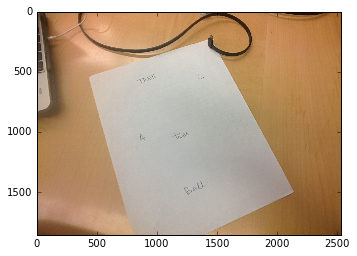

In [6]:
#image_filename = 'language_images/written_word_3.jpg'
image_filename = 'language_images/written_word_4_rotated.jpg'
#image_filename = 'language_images/written_word_7.jpg'
#image_filename = 'language_images/ball1.png'
# In BGR format
image = cv2.imread(image_filename, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)

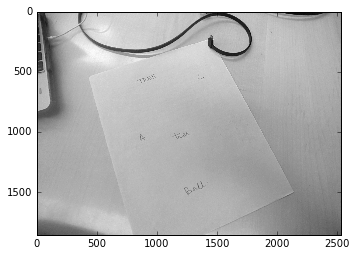

In [7]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv_gray = image_hsv[:, :, 2]
plt.imshow(image_hsv_gray, cmap='gray')

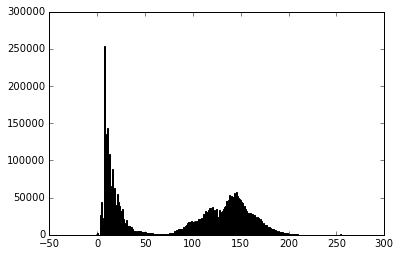

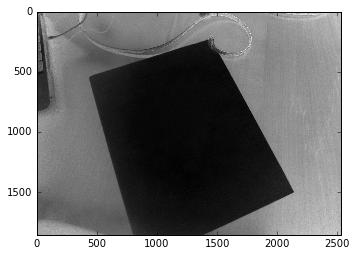

In [8]:
INDEX=1
plt.hist(image_hsv[:, :, INDEX].ravel(), 257, [-1,255])
plt.show()
plt.imshow(image_hsv[:, :, INDEX], cmap='gray')

76.0


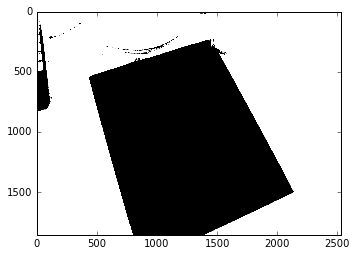

In [9]:
threshold, image_hsv_1_threshold = cv2.threshold(image_hsv[:, :, 1], 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(threshold)
plt.imshow(image_hsv_1_threshold, cmap='gray')

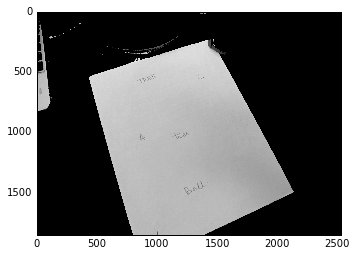

In [10]:
image_hsv_gray_1 = image_hsv_gray.copy()
image_hsv_gray_1[image_hsv[:, :, 1] > threshold] = 0
plt.imshow(image_hsv_gray_1, cmap='gray')

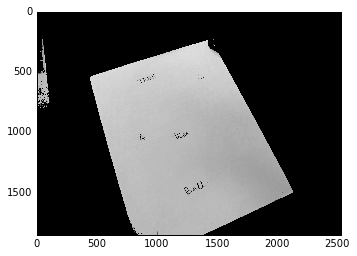

In [11]:
image_hsv_gray_2 = image_hsv_gray.copy()
image_hsv_gray_2[image_hsv[:, :, 1] > 50] = 0
image_hsv_gray_2[image_hsv[:, :, 2] < 150] = 0
plt.imshow(image_hsv_gray_2, cmap='gray')

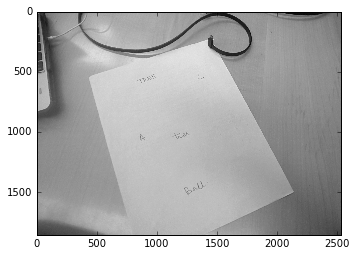

In [10]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray')

0.0


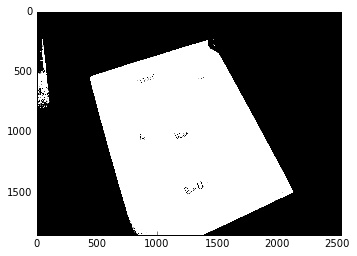

In [12]:
# Thresholding
threshold, image_threshold = cv2.threshold(image_hsv_gray_2, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(threshold)
plt.imshow(image_threshold, cmap='gray')

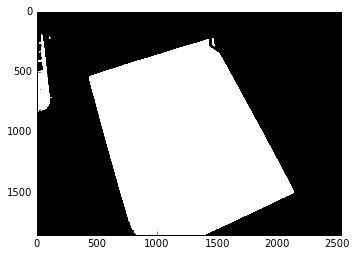

In [12]:
# Blur, Dilate - Not used
kernel5 = np.ones((11, 11), np.uint8)
image_blur = cv2.dilate(image_threshold, kernel5)
plt.imshow(image_blur, cmap='gray')

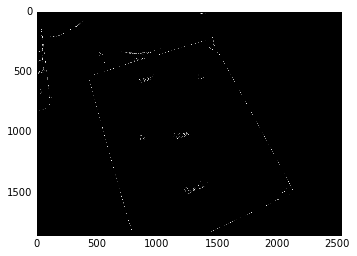

In [23]:
### Canny - Not needed
image_edges = cv2.Canny(image_threshold, 100, 200, apertureSize = 3)
plt.imshow(image_edges, cmap='gray')

7 (7, 1, 2)


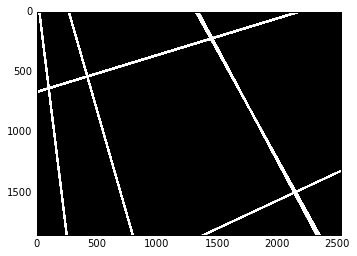

In [24]:
### HoughForLines - not needed
image_lines = image.copy()
image_lines[:,:,:] = 0
lines = cv2.HoughLines(image_edges, 1, np.pi/180, 200)
print(len(lines), lines.shape)
minLineLength = 100
maxLineGap = 10
for line in lines:
    rho = line[0][0]
    theta = line[0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 5000*(-b))
    y1 = int(y0 + 5000*(a))
    x2 = int(x0 - 5000*(-b))
    y2 = int(y0 - 5000*(a))

    cv2.line(image_lines,(x1,y1),(x2,y2),(0,0,255),20)
image_lines = cv2.cvtColor(image_lines, cv2.COLOR_RGB2GRAY)    
plt.imshow(image_lines, cmap='gray')

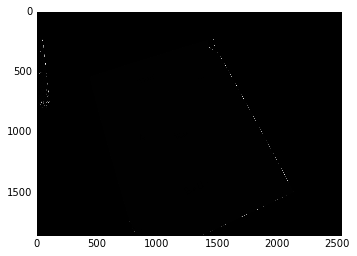

In [83]:
image_threshold_c = image_threshold.copy()
im2, contours, hierarchy = cv2.findContours(image_threshold_c, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #cv2.RETR_TREE
plt.imshow(im2, cmap='gray')

In [84]:
# Find index of longest contour
maxLen = 0
maxIndex = -1
for i, contour in enumerate(contours):
    if len(contour) > maxLen:
        maxLen = len(contour)
        maxIndex = i
print(maxIndex, maxLen)

# or 
# Find the index of the largest contour
#areas = [cv2.contourArea(c) for c in contours]
#max_index = np.argmax(areas)
#cnt=contours[max_index]

144 2941


In [85]:
## Trying to find the 4 extreme points of the contour
# Idea is to find the leftnost point, rightmost point, topmost and bottommost point

temp = np.copy(contours[maxIndex])
large_contour = temp.squeeze()

minArgIndex = np.argmin(large_contour, axis=0)
maxArgIndex = np.argmax(large_contour, axis=0)

### This logic is not clean: it assumes the paper is rotated in a specific way - this can be taken care of though by having checks
## Or it might make more sense to rotate it, crop it, then find contours - atleast now we know the paper has no rotation !
top_left     = large_contour[minArgIndex[0]]
bottom_right = large_contour[maxArgIndex[0]]

top_right    = large_contour[minArgIndex[1]]
bottom_left  = large_contour[maxArgIndex[1]]

print(top_left)
print(bottom_right)

print(top_right)
print(bottom_left)

[436 550]
[2126 1498]
[1417  237]
[ 837 1854]


In [86]:
contour_box = np.ones((4, 3), dtype=int)
contour_box[0,0:2] = top_left
contour_box[1,0:2] = top_right
contour_box[2,0:2] = bottom_right
contour_box[3,0:2] = bottom_left
print(contour_box)

[[ 436  550    1]
 [1417  237    1]
 [2126 1498    1]
 [ 837 1854    1]]


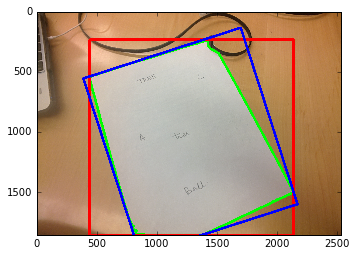

In [87]:
image_contour = image.copy()
cv2.drawContours(image_contour, contours, maxIndex, (0,255,0), 20)  # Green

x,y,w,h = cv2.boundingRect(contours[maxIndex])
cv2.rectangle(image_contour, (x,y), (x+w,y+h), (255,0,0), 20)   # Red

rect = cv2.minAreaRect(contours[maxIndex])
# rect has the angle of rotation.
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(image_contour,[box],0,(0,0,255),20)  # Blue

plt.imshow(image_contour, cmap='gray')

In [88]:
new_box = np.ones((4,3))
new_box[:,0:2] = box
print(new_box)

[[  8.56000000e+02   2.02000000e+03   1.00000000e+00]
 [  3.84000000e+02   5.58000000e+02   1.00000000e+00]
 [  1.68800000e+03   1.38000000e+02   1.00000000e+00]
 [  2.15900000e+03   1.60000000e+03   1.00000000e+00]]


## Progress So far: Extract white regions of image -> convert image to HSV, then look for pixels with low S value - this is ROI. Blacken out non ROI. Then threshold that image, then findContours, then take largest contour.

Red bounding box ---
[[  540.45585074  1842.00867833]
 [  540.08744327   305.70536704]
 [ 1910.0566484    306.31936892]
 [ 1909.47334725  1842.31567743]]
Green contour box ---
[[  592.03231365   314.05584252]
 [ 1621.7503378    317.34076949]
 [ 1909.38124613  1735.11030668]
 [  573.33584803  1678.19199488]]


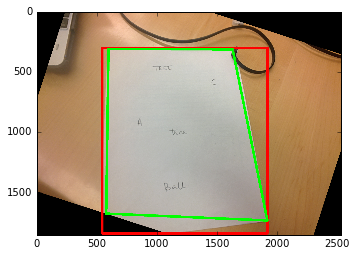

In [90]:
(h, w) = image.shape[:2]
center = (w / 2, h / 2)
 
# rotate the image by 180 degrees
M = cv2.getRotationMatrix2D(center, rect[-1], 1.0)
image_rotated = cv2.warpAffine(image, M, (w, h))

rotated_box = np.dot(M, new_box.T)
rotated_box = rotated_box.T
print('Red bounding box ---')
print(rotated_box)
rotated_box_int = np.int0(rotated_box)
cv2.drawContours(image_rotated, [rotated_box_int], 0, (255,0,0), 20)  # Red

rotated_contour_box = np.dot(M, contour_box.T)
rotated_contour_box = rotated_contour_box.T
print('Green contour box ---')
print(rotated_contour_box)
rotated_contour_box_int = np.int0(rotated_contour_box)
cv2.drawContours(image_rotated, [rotated_contour_box_int], 0, (0,255,0), 20)  # Green

plt.imshow(image_rotated)

In [92]:
# May not be needed - M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0
#box1 = np.float32([ kp2[m.trainIdx].pt for m in rotated_contour_box ]).reshape(-1,1,2)
box1 = rotated_contour_box.reshape(-1,1,2)
box2 = rotated_box.reshape(-1,1,2)
cv2.getPerspectiveTransform(box1, box2)

error: ..\..\..\modules\imgproc\src\imgwarp.cpp:6353: error: (-215) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function cv::getPerspectiveTransform


In [17]:
top_left = np.amin(rotated_box_int, 0)
bottom_right = np.amax(rotated_box_int, 0)
# Hack
#top_left[1] = 0
print(top_left, bottom_right)

[540 305] [1910 1842]


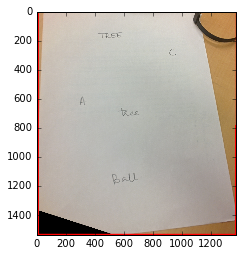

In [18]:
image_cropped = image_rotated[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
plt.imshow(image_cropped)


In [163]:
cv2.imwrite('cropped_image.png', image_cropped)

True

In [165]:
vision = VisionApi()
new_resp = vision.detect_text(['cropped_image.png'])

cropped_image.png


In [166]:
print(new_resp)

{'cropped_image.png': [{'locale': 'en', 'description': 'Akshay\nElephant\nall\n', 'boundingPoly': {'vertices': [{'y': 719, 'x': 262}, {'y': 719, 'x': 1430}, {'y': 1314, 'x': 1430}, {'y': 1314, 'x': 262}]}}, {'description': 'Akshay', 'boundingPoly': {'vertices': [{'y': 719, 'x': 262}, {'y': 719, 'x': 516}, {'y': 773, 'x': 516}, {'y': 773, 'x': 262}]}}, {'description': 'Elephant', 'boundingPoly': {'vertices': [{'y': 1240, 'x': 873}, {'y': 1216, 'x': 1144}, {'y': 1290, 'x': 1150}, {'y': 1314, 'x': 879}]}}, {'description': 'all', 'boundingPoly': {'vertices': [{'y': 845, 'x': 1335}, {'y': 845, 'x': 1430}, {'y': 889, 'x': 1430}, {'y': 889, 'x': 1335}]}}]}


# Image homography and warping example

### Generate the key points
template_pts = np.float32([ kp1[m.trainIdx].pt for m in matches]).reshape(-1,1,2)
image_pts    = np.float32([ kp2[m.queryIdx].pt for m in matches]).reshape(-1,1,2)

### Perform Homography on the generated keypoints to find Transformation Matrix M
M, mask = cv2.findHomography(image_pts, template_pts, cv2.RANSAC, 1.0)

### Warp source image to destination based on homography matrix M
image0_gray_outB = cv2.warpPerspective(image0_gray, M, (image0_gray.shape[1], image0_gray.shape[0]))

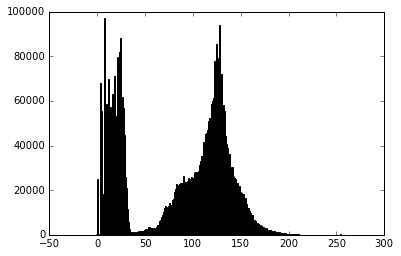

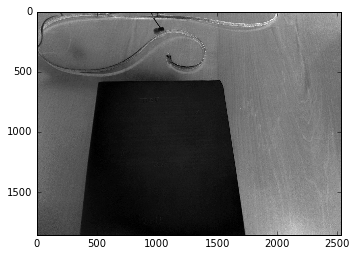

In [36]:
#### Image 2:
image_filename = 'language_images/written_word_5_slant.jpg'
image = cv2.imread(image_filename, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv_gray = image_hsv[:, :, 2]

INDEX=1
plt.hist(image_hsv[:, :, INDEX].ravel(), 257, [-1,255])
plt.show()
plt.imshow(image_hsv[:, :, INDEX], cmap='gray')

69.0


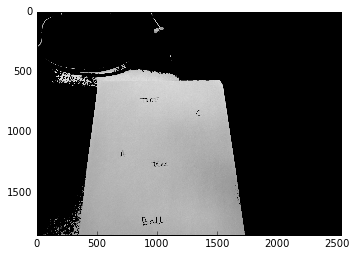

In [39]:
threshold, image_hsv_1_threshold = cv2.threshold(image_hsv[:, :, 1], 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(threshold)
plt.imshow(image_hsv_1_threshold, cmap='gray')

image_hsv_gray_2 = image_hsv_gray.copy()
image_hsv_gray_2[image_hsv[:, :, 1] > threshold] = 0
image_hsv_gray_2[image_hsv[:, :, 2] < 150] = 0
plt.imshow(image_hsv_gray_2, cmap='gray')

0.0
1002 3040


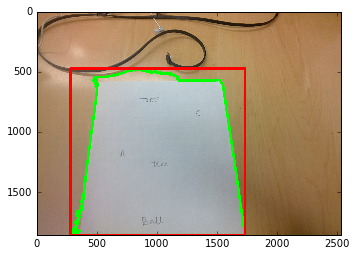

In [43]:
# Thresholding
threshold, image_threshold = cv2.threshold(image_hsv_gray_2, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(threshold)

image_threshold_c = image_threshold.copy()
im2, contours, hierarchy = cv2.findContours(image_threshold_c, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #cv2.RETR_TREE

# Find index of longest contour
maxLen = 0
maxIndex = -1
for i, contour in enumerate(contours):
    if len(contour) > maxLen:
        maxLen = len(contour)
        maxIndex = i
print(maxIndex, maxLen)

image_contour = image.copy()
cv2.drawContours(image_contour, contours, maxIndex, (0,255,0), 20)  # Green

x,y,w,h = cv2.boundingRect(contours[maxIndex])
cv2.rectangle(image_contour, (x,y), (x+w,y+h), (255,0,0), 20)   # Red

rect = cv2.minAreaRect(contours[maxIndex])
# rect has the angle of rotation.
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(image_contour,[box],0,(0,0,255),20)  # Blue

plt.imshow(image_contour, cmap='gray')

# Example usage of VisionAPI for Label detection

In [10]:
# Create a client object for the Vision API
vision = VisionApi()

#fileslist = ['demo-image.jpg', 'language_images/images.png', 'language_images/english_alphabets.jpg']
fileslist = ['language_images/tree1.jpeg', 'language_images/tree2.jpg', 'language_images/house1.jpg', 'language_images/building1.jpg']

texts = vision.detect_label(fileslist)
for k,v in texts.items():
    print(k, v)

language_images/tree1.jpeg
language_images/tree2.jpg
language_images/house1.jpg
language_images/building1.jpg
language_images/tree1.jpeg [{'mid': '/m/01bqvp', 'score': 0.97342336, 'description': 'sky'}, {'mid': '/m/07j7r', 'score': 0.95158088, 'description': 'tree'}, {'mid': '/m/05h0n', 'score': 0.9460271, 'description': 'nature'}, {'mid': '/m/07pw27b', 'score': 0.87172842, 'description': 'atmospheric phenomenon'}, {'mid': '/m/05s2s', 'score': 0.857808, 'description': 'plant'}, {'mid': '/m/0csby', 'score': 0.830041, 'description': 'cloud'}, {'mid': '/m/08t9c_', 'score': 0.758511, 'description': 'grass'}, {'mid': '/m/0754v', 'score': 0.75202054, 'description': 'season'}, {'mid': '/m/04_5sg', 'score': 0.74603266, 'description': 'hill'}, {'mid': '/m/02_ktj', 'score': 0.74512017, 'description': 'morning'}]
language_images/house1.jpg [{'mid': '/m/01d74z', 'score': 0.89881939, 'description': 'night'}, {'mid': '/m/03jm5', 'score': 0.86722296, 'description': 'house'}, {'mid': '/m/039jbq', 'sco

In [12]:
for k, vs in texts.items():
    print('----- ', k)
    for v in vs:
        print(v)
    print()

-----  language_images/tree1.jpeg
{'mid': '/m/01bqvp', 'score': 0.97342336, 'description': 'sky'}
{'mid': '/m/07j7r', 'score': 0.95158088, 'description': 'tree'}
{'mid': '/m/05h0n', 'score': 0.9460271, 'description': 'nature'}
{'mid': '/m/07pw27b', 'score': 0.87172842, 'description': 'atmospheric phenomenon'}
{'mid': '/m/05s2s', 'score': 0.857808, 'description': 'plant'}
{'mid': '/m/0csby', 'score': 0.830041, 'description': 'cloud'}
{'mid': '/m/08t9c_', 'score': 0.758511, 'description': 'grass'}
{'mid': '/m/0754v', 'score': 0.75202054, 'description': 'season'}
{'mid': '/m/04_5sg', 'score': 0.74603266, 'description': 'hill'}
{'mid': '/m/02_ktj', 'score': 0.74512017, 'description': 'morning'}

-----  language_images/house1.jpg
{'mid': '/m/01d74z', 'score': 0.89881939, 'description': 'night'}
{'mid': '/m/03jm5', 'score': 0.86722296, 'description': 'house'}
{'mid': '/m/039jbq', 'score': 0.80911863, 'description': 'urban area'}
{'mid': '/m/04k84', 'score': 0.79766893, 'description': 'light'